<a href="https://colab.research.google.com/github/Juansierraas/Talleres-de-Python/blob/main/Ejercicio_Practico_15_Taller_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las librerias necesarias para el aprendizaje de maquinas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [64]:
# Cargamos la base de datos de esta manera, siendo esta mushrooms.csv
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms (4).csv


In [65]:
# Verificamos que si haya cargado la base de datos
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('mushrooms', name)

mushrooms mushrooms (4).csv


In [66]:
import io
df = pd.read_csv(io.BytesIO(uploaded['mushrooms (4).csv']))

In [68]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  


'poisonous' -to- 'edible' ratio: 0.93
poisonous_cnt: 3916, edible_cnt: 4208


<Axes: title={'center': 'Balance Checking for input class in Mushroom Dataset'}, xlabel='class', ylabel='count'>

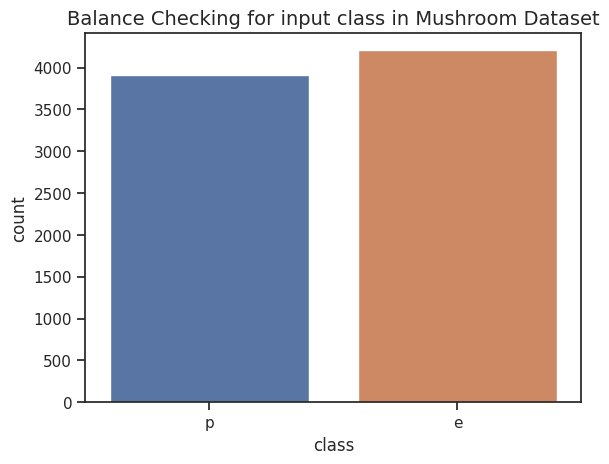

In [87]:
edible_cnt = df[df["class"] == "e"]["class"].count()
poisonous_cnt = df[df["class"] == "p"]["class"].count()
p_e_ratio = poisonous_cnt/float(edible_cnt)
print("\n'poisonous' -to- 'edible' ratio: {}\npoisonous_cnt: {}, edible_cnt: {}"
      .format(p_e_ratio.round(2),poisonous_cnt,edible_cnt))

sns.set(style="ticks", color_codes=True)
plt.title("Balance Checking for input class in Mushroom Dataset",fontsize=14)
sns.countplot(x = df['class'], data = df)

In [88]:
columns = df.columns.values
for column in columns:
  print("{0}: {1}".format(column, df[column].unique()))

print("\n There are {} '?' values in the feature 'stalk-root'.".format(df[df["stalk-root"] == "?"]["stalk-root"].count()))

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']

 There are 2480 '?' values in the feature 'stalk-root'.


In [89]:
df = df.drop("veil-type",axis = 1)
df.shape

(8124, 22)

In [92]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [93]:
#Valores numericos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
  df[column]=le.fit_transform(df[column])

In [94]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [98]:
X = df.drop('class',axis=1)
y = df['class']
X


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [99]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

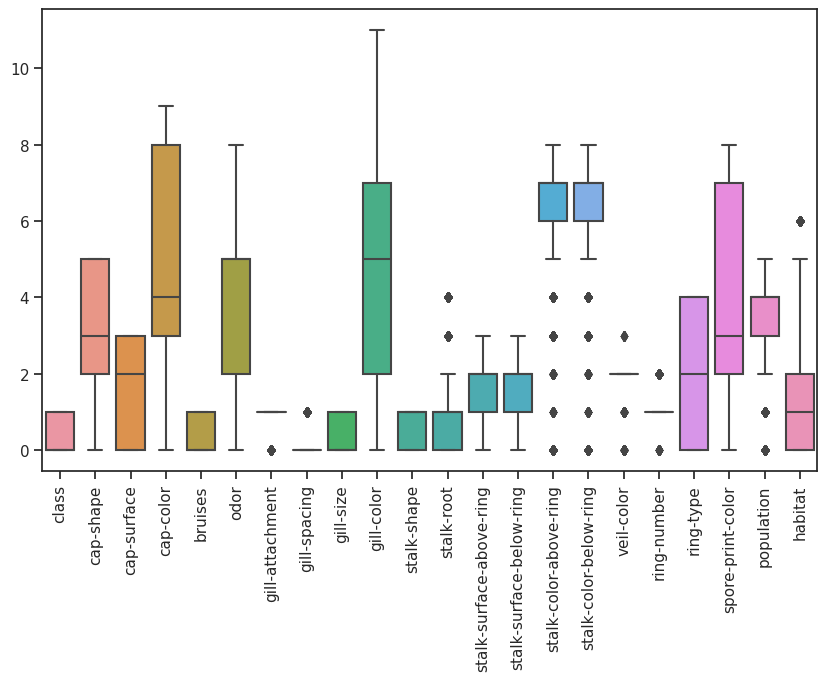

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667


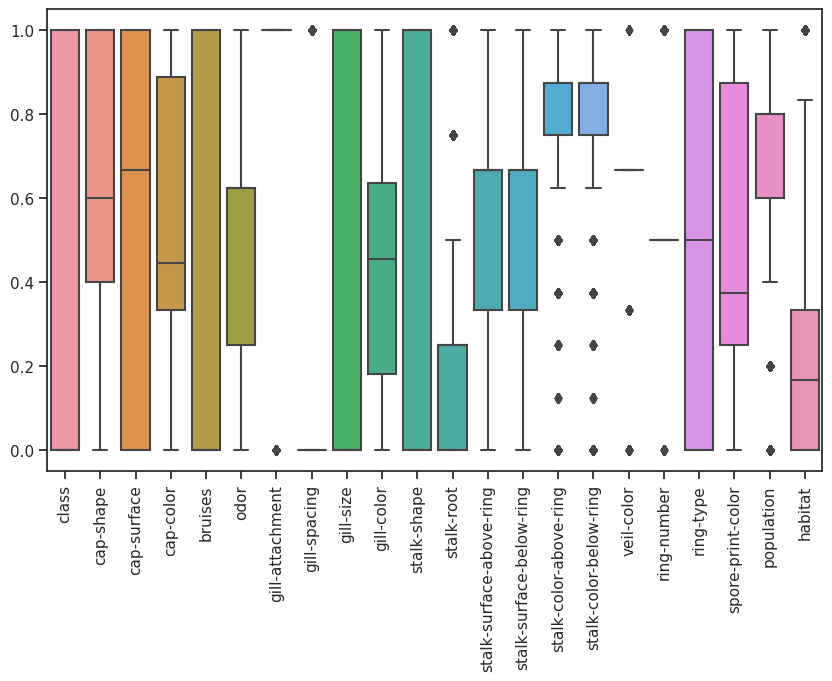

In [107]:
#La grafica se normaliza entre 0 y 1 para hacer mas precisos los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_norm)
plt.xticks(rotation=90);

In [108]:
# Definimos la etiqueta de salida y las variables predictoras
X = df_norm.iloc[:, [1, 5]].values
y = df_norm.iloc[:, 0].values
y = y.reshape(y.size, 1)

In [109]:
# Definir el conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# usamos 30% de los datos para la prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 2), (2438, 2), (5686, 1), (2438, 1))

In [110]:
# Devuelve el número de verdaderos negativos para una tarea de clasificación dada.
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]

In [111]:
# Devuelve el número de falsos positivos para una tarea de clasificación dada.
def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]

In [112]:
# Devuelve el número de falsos negativos para una tarea de clasificación dada.
def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]

In [113]:
# Devuelve el número de verdaderos positivos para una tarea de clasificación dada.
def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]

In [114]:
# Devuelve el número de verdaderos negativos para una tarea de clasificación dada.
def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

In [115]:
# Accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

In [116]:
# Propósito de la validación cruzada
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

In [117]:
def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [118]:
# Lista alamcenada de las acc y rcc de las salidas de cada modelo
acc = []
roc = []

In [119]:
# Primer Modelo - Naive Bayes
model1 = GaussianNB()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
# Accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

Naive Bayes : 
Accuracy: 0.9036095159967186
F1 score: 0.9015500628403855
Recall: 0.8959200666111574
Precision: 0.9072512647554806

 confussion matrix:
 [[1127  110]
 [ 125 1076]]


In [121]:
# Segundo Modelo - Regresión logística
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2.score(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
# Accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Logistic Regression : 
Accuracy: 0.6045939294503692
F1 score: 0.46085011185682323
Recall: 0.3430474604496253
Precision: 0.7018739352640545

 confussion matrix:
 [[1062  175]
 [ 789  412]]


In [129]:
# Tercer Modelo - Support Vector Machine
model3 = SVC(gamma='auto', kernel='linear')
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
# Accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Support Vector Machine : 
Accuracy: 0.7116488925348646
F1 score: 0.6743862899490506
Recall: 0.6061615320566195
Precision: 0.7599164926931107

 confussion matrix:
 [[1007  230]
 [ 473  728]]


In [138]:
# Cuarto Modelo - KNN
model4 = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
y_pred_train = model4.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [139]:
# Accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
K-Nearest Neighbors : 
Accuracy: 0.9844134536505332
F1 score: 0.9839255499153976
Recall: 0.9683597002497918
Precision: 1.0

 confussion matrix:
 [[1237    0]
 [  38 1163]]


In [140]:
# Quinto Modelo - Random Forest
model5 = RandomForestClassifier(n_estimators=20, max_depth=10)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
y_pred_train = model5.predict(X_train)

<ipython-input-140-b7a2279c1f39>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(X_train, y_train)


In [141]:
# Accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Random Forest : 
Accuracy: 0.9844134536505332
F1 score: 0.9839255499153976
Recall: 0.9683597002497918
Precision: 1.0

 confussion matrix:
 [[1237    0]
 [  38 1163]]


In [144]:
# Sexto Modelo - Árboles de decisión
model6 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model6.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [145]:
# Accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Decision Tree : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Decision Tree : 
Accuracy: 0.9844134536505332
F1 score: 0.9839255499153976
Recall: 0.9683597002497918
Precision: 1.0

 confussion matrix:
 [[1237    0]
 [  38 1163]]
